In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse

In [54]:
class gas_canistor:
    def __init__(self, loc = (0.5, 0.5), radius = 0.05, concentration = 1.0):
        self.radius = radius

        self.x = loc[0]
        self.y = loc[1]

        self.lb_x = self.x - self.radius
        self.ub_x = self.x + self.radius
        self.lb_y = self.y - self.radius
        self.ub_y = self.y + self.radius

        self.concentration = concentration

def f(canistor: gas_canistor, x: np.array, y: np.array):
    concentrations = np.where((x >= canistor.lb_x) & (x <= canistor.ub_x) & (y >= canistor.lb_y) & (y <= canistor.ub_y), canistor.concentration, 0)
    return concentrations

In [55]:
can_1 = gas_canistor()
x = np.linspace(0.0, 1.0, 100)
y = np.linspace(0.0, 1.0, 100)
concentrations = f(can_1, x, x)

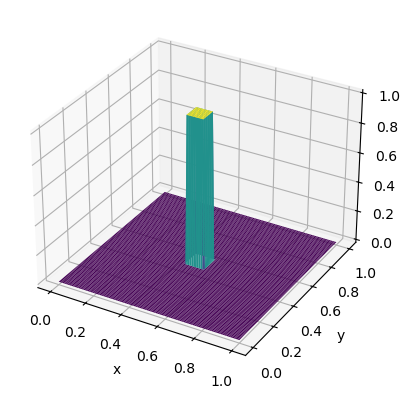

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


X, Y = np.meshgrid(x, y)

Z = f(can_1, X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [57]:
u = np.zeros((X.shape[0] * Y.shape[0], 1))

In [103]:
A = np.zeros((X.shape[0] * Y.shape[0], X.shape[0] * Y.shape[0]))

In [139]:
L = 1.0
T = 10.0                 # Total time
Nt = 1000                # Number of time steps
Nx = 3
Ny = 3
dx = L / (Nx - 1)       # Spatial step size
dy = L / (Ny - 1)
dt = T / Nt             # Time step size

Cx = dt / dx**2
Cy = dt / dy**2

In [141]:
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)

X, Y = np.meshgrid(x, y)
Z = f(can_1, X, Y)

u_initial = Z.reshape((Nx*Ny,))

In [142]:
B = np.zeros((Nx, Ny))

a = 1 + 2*dt*(1/dx**2 + 1/dy**2)

for i in range(Nx - 1):
    B[i, i] = a
    B[i+1, i] = -Cx
    B[i, i+1] = -Cx

B[-1, -1] = a

In [146]:
A = sparse.bmat([[B if i == j else -Cy * np.eye(Nx) if abs(i-j)==1
                else None for i in range(Nx)]
                for j in range(Ny)], format='csr')

In [148]:
u = u_initial.copy()

for n in range(Nt - 1):
    u = sparse.linalg.spsolve(A, u)
    print(f"On iteration: {n}")

On iteration: 0
On iteration: 1
On iteration: 2
On iteration: 3
On iteration: 4
On iteration: 5
On iteration: 6
On iteration: 7
On iteration: 8
On iteration: 9
On iteration: 10
On iteration: 11
On iteration: 12
On iteration: 13
On iteration: 14
On iteration: 15
On iteration: 16
On iteration: 17
On iteration: 18
On iteration: 19
On iteration: 20
On iteration: 21
On iteration: 22
On iteration: 23
On iteration: 24
On iteration: 25
On iteration: 26
On iteration: 27
On iteration: 28
On iteration: 29
On iteration: 30
On iteration: 31
On iteration: 32
On iteration: 33
On iteration: 34
On iteration: 35
On iteration: 36
On iteration: 37
On iteration: 38
On iteration: 39
On iteration: 40
On iteration: 41
On iteration: 42
On iteration: 43
On iteration: 44
On iteration: 45
On iteration: 46
On iteration: 47
On iteration: 48
On iteration: 49
On iteration: 50
On iteration: 51
On iteration: 52
On iteration: 53
On iteration: 54
On iteration: 55
On iteration: 56
On iteration: 57
On iteration: 58
On iter

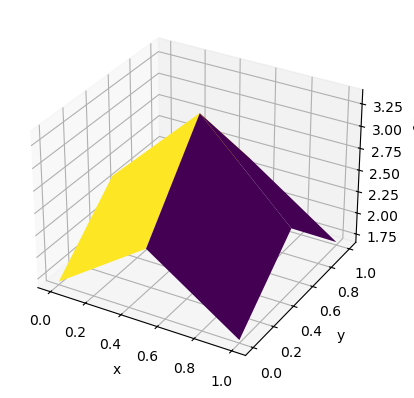

In [150]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, u.reshape((Nx,Ny)), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [134]:
my_mat = A.toarray()

In [138]:
print(my_mat[90:110, 90:110])

[[ 97.04 -24.01   0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [-24.01  97.04 -24.01   0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.   -24.01  97.04 -24.01   0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.   -24.01  97.04 -24.01   0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.   -24.01  97.04 -24.01   0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   -24.01  97.04 -24.01   0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.   -24.01  97.04 -24.01   0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]